In [26]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import itertools

In [27]:
#генерирую точки

def random_points(n):
    points = []
    for i in range(n):
        points.append([np.random.randint(0, 100), np.random.randint(0, 100)])
    return points

# расстояние между точками
def distance(a, b):
    return np.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)

# определение круга
def create_circle(n, points):
    x_sum, y_sum, R = 0, 0, 0
    for i in range(n):
        x_sum += points[i][0]
        y_sum += points[i][1]
    center = [x_sum/len(points), y_sum/len(points)]
    for i in range(len(points)):
        R = max(R, distance(center, points[i]))
    return R, center, points

# поиск начальных центроид
def circle_centroids(R, k, x_sum, y_sum):
    centroids = []
    for i in range(k):
        centroids.append([x_sum+R*np.cos(2*np.pi*i/k), y_sum+R*np.sin(2*np.pi*i/k)])
    return centroids

# кластеризация точек
def points_clusterize(points, centroids):
    cluster_points = [[] for i in range(len(centroids))]
    for i in range(len(points)):
        min = 100
        for j in range(len(centroids)):
            dist = distance(points[i], centroids[j])
            if dist < min:
                min = dist
        for j in range(len(centroids)):
            dist = distance(points[i], centroids[j])
            if min == dist:
                cluster_points[j].append(points[i])
    return cluster_points

#поиск суммы расстояний   
def distance_sum(clusters, centroids):
    sum = 0
    for i in range(len(clusters)):
        for j in range(len(clusters[i])):
            sum += distance(clusters[i][j], centroids[i])
    return sum

# поиска оптимального количества кластеров
def optimal_clusters(k_max, n, points, R, center):
    k_dist_sum = []
    for i in range(1, k_max + 1):
        centroids = circle_centroids(R, i, center[0], center[1])
        clusters = points_clusterize(points, centroids)
        dist_sum = distance_sum(clusters, centroids)
        k_dist_sum.append(dist_sum)
    min = sys.maxsize
    k = 0
    for i in range(1, len(k_dist_sum) - 1):
        res = abs(k_dist_sum[i]-k_dist_sum[i+1])/(k_dist_sum[i-1]-k_dist_sum[i])
        if res < min:
            min = res
            k = i + 1
    return k

# пересчет центроид
def recalculate_centroids(cluster_points, k):
    centroids = []
    for i in range(k):
        x_sum, y_sum = 0, 0
        for j in range(len(cluster_points[i])):
            x_sum += cluster_points[i][j][0]
            y_sum += cluster_points[i][j][1]
        center = [x_sum/len(cluster_points[i]), y_sum/len(cluster_points[i])]
        centroids.append(center)
    return centroids

# отрисовка графика
def draw(centroids, cluster_points):
    colors = itertools.cycle(['blue', 'green', 'orange', 'red', 'yellow', 'violet'])
    colorsIterator = iter(colors)
    for k in range(len(centroids)):
        plt.scatter([i[0] for i in cluster_points[k]], [i[1] for i in cluster_points[k]], color=next(colors))
    plt.scatter([i[0] for i in centroids], [i[1] for i in centroids], color = 'black', marker="+")
    plt.axis('scaled')
    plt.draw()
    plt.show()




In [28]:
def k_means_clustering(n, k_max):
    points = random_points(n)
    circle = create_circle(n, points)
    R, center = circle[0], circle[1]
    k = optimal_clusters(k_max, n, points, R, center)
    print('Количество кластеров =', k)
    print('Начальный круг:')

    centroids = circle_centroids(R, k, center[0], center[1])
    clusters = points_clusterize(points, centroids)

    plt.scatter([i[0] for i in centroids], [i[1] for i in centroids], color = 'black', marker="+")
    draw(centroids, clusters)
    plt.show()
    print('\n')

    centroids_list = []
    centroids_list.append(centroids)

    for i in range(sys.maxsize):
        print('Итерация №', i+1)
        centroids = recalculate_centroids(clusters, k)
        clusters = points_clusterize(points, centroids)
        centroids_list.append(centroids)

        if centroids_list[i] == centroids_list[i + 1]:
            print('Конец выполнения')
            break

        draw(centroids, clusters)
        print('\n')

Количество кластеров = 12
Начальный круг:


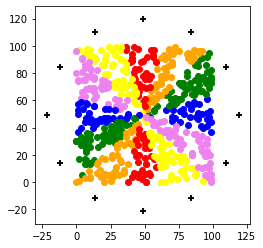



Итерация № 1


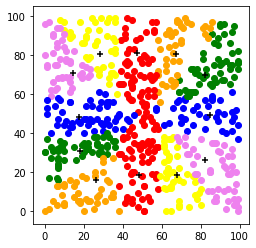



Итерация № 2


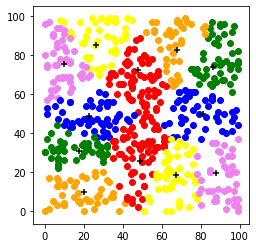



Итерация № 3


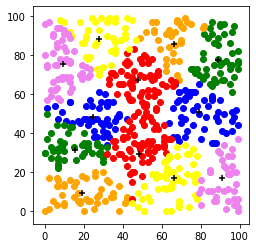



Итерация № 4


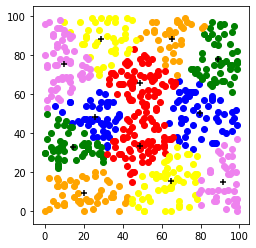



Итерация № 5


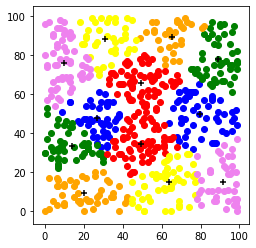



Итерация № 6


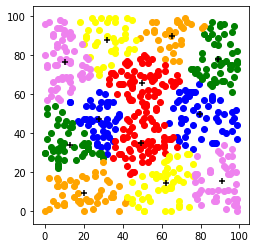



Итерация № 7


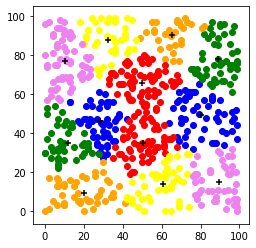



Итерация № 8


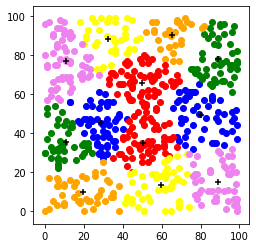



Итерация № 9


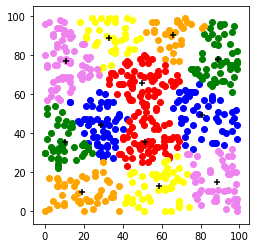



Итерация № 10


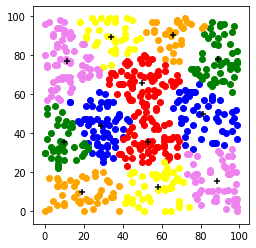



Итерация № 11


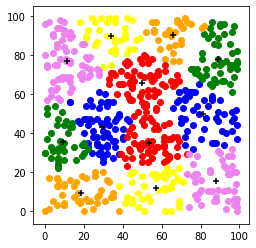



Итерация № 12


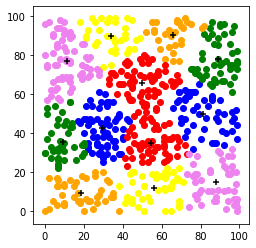



Итерация № 13


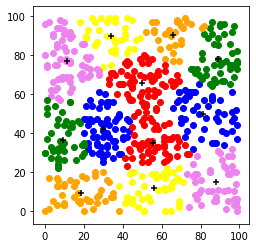



Итерация № 14


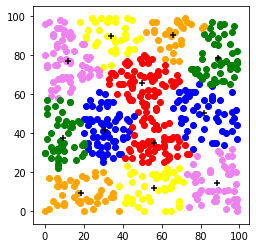



Итерация № 15


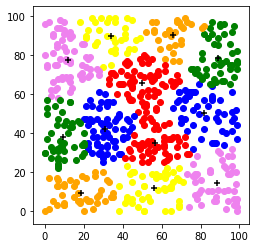



Итерация № 16


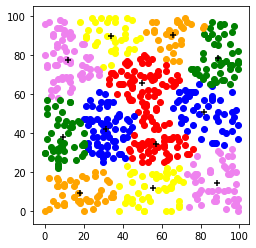



Итерация № 17


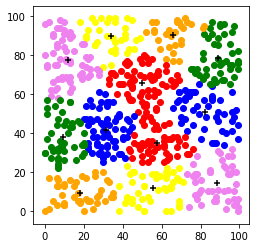



Итерация № 18
Конец выполнения


In [29]:
k_means_clustering(600, 15)